# Глава 6 - Теория Вероятности

### Условная вероятность

In [8]:
import random
# парадокс Мальчика и Девочки
def random_kid():
    return random.choice(['boy', 'girl'])

In [6]:
both_girls = 0
older_girls = 0
either_girls = 0

In [12]:
random.seed(0)

for _ in range(100000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girls +=1
    if older == 'girl' and younger == 'girl':
        both_girls +=1
    if older == 'girl' or younger == 'girl':
        either_girls +=1
        
print('P(обе \ старшая):', both_girls / older_girls)
print('P(обе \ любая):', both_girls / either_girls)

P(обе \ старшая): 0.4988703840694164
P(обе \ любая): 0.3327820752200587


### Нормальное распределение

In [15]:
import math
import matplotlib.pyplot as plt
# функция распределения
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma **2) / (sqrt_two_pi * sigma))

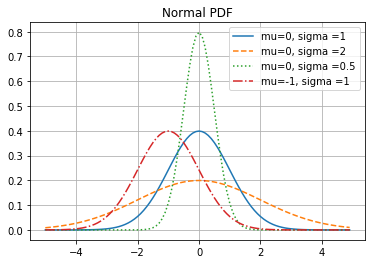

In [21]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma =1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma =2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma =0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma =1')
plt.legend()
plt.grid()
plt.title('Normal PDF')
plt.show()

In [17]:
# функция нормального распределения CDF
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

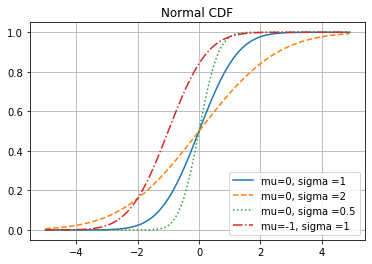

In [20]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma =1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma =2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma =0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma =1')
plt.legend(loc=4)
plt.grid()
plt.title('Normal CDF')
plt.show()

In [31]:
# обратная ИФР
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 0:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
        return mid_z

## Центральная предельная теорема (ЦПТ) 

In [36]:
from collections import Counter
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [33]:
# биномиальное распределение
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [39]:
# построить диаграмму
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()], 
            [v / num_points for v in histogram.values()], 
           0.8, 
           color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
         for i in xs]
    plt.plot(xs, ys)
    plt.title('Binominal + Graph')
    plt.grid()
    plt.show()

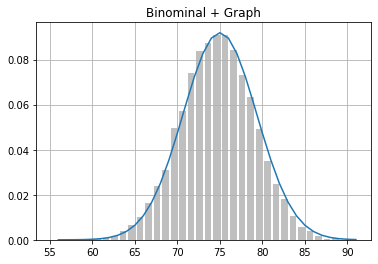

In [40]:
make_hist(0.75, 100, 10000)